# Inaugural Project

Imports and set magics:

In [8]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from scipy import optimize

# Autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Importing the model and the class
import inauguralproject as HSM
model = HSM.HouseholdSpecializationModelClass()




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

In [9]:
#Values
alpha = [0.25,0.5,0.75]
sigma = [0.5,1,1.5]


#Creating and printing table
def print_table(alpha, sigma):
    
    table = ''
    
    table += f'{"":3s}'
    for j, HF in enumerate(sigma):
       table += f'{j:8d}' 
       index=[0.5,1,1.5]
    table += '\n'
    
    for i, a in enumerate(alpha):
        if i > 0:
            table += '\n'
        table += f'{i:3d} '
        for j, s in enumerate(sigma):
            model.par.alpha = a
            model.par.sigma = s
            HM = model.solve_discrete().HM
            HF = model.solve_discrete().HF
            table += f'{HF/HM:8.4f}'
    
    
    print(table)

# Dataframe
df = pd.DataFrame({
    "\u03C3=0.5": ["0.5455", "1.0000", "1.8333"],
    "\u03C3=1": ["0.3077", "1.0000", "3.2500"],
    "\u03C3=1.5": ["0.2143", "1.0000", "4.6667"]
})

# Replace category numbers with titles
df.index = ["\u03B1=0.25",  "\u03B1=0.5",  "\u03B1=0.75"]

# Dataframe after conversion
print(df)

         σ=0.5     σ=1   σ=1.5
α=0.25  0.5455  0.3077  0.2143
α=0.5   1.0000  1.0000  1.0000
α=0.75  1.8333  3.2500  4.6667


When alpha=0.5, females and males work an equal amount of time in the household no matter the value of sigma. When alpha=0.25, men work more hours in the household than women. When alpha=0.75, woman work more hours in the household than men. As sigma increases, the ratio of household work becomes more unequal between the genders.

# Question 2

/Users/clarajensen/Desktop/Introduction to Programming and Numerical Analysis /projects-2023-mc/inauguralproject/inauguralproject.py:72: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


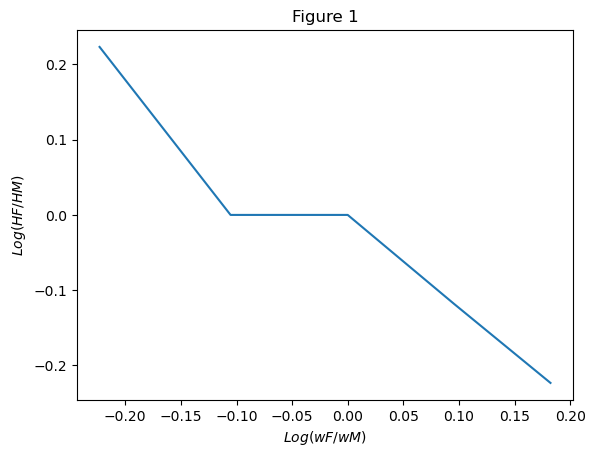

In [10]:
# Defining the female wages
model.solve_wF_vec()
wF_vec = model.par.wF_vec

# Setting alpha and sigma as their initial values
model.par.alpha = 0.5
model.par.sigma = 1

# Defining the log-parameters for working at home and for the wages. 
    # opt.HFHM = HF[j]/HM[j] is added to the class
    # Note that since par.wM = 1.0 it is unnecessary to divide with it.
log_HFHM = []
log_wF = []

# Making a loop to find the optimal relationship between HF and HM for different female wages
for wF in wF_vec:
    model.par.wF = wF
    opt = model.solve_discrete()
    log_HFHM.append(np.log(opt.HF/opt.HM))
    log_wF.append(np.log(model.par.wF))

# Plotting the results
plt.plot(log_wF,log_HFHM)
plt.xlabel('$Log(wF/wM)$')
plt.ylabel('$Log(HF/HM)$')
plt.title('Figure 1')

plt.show()

In (0,0), men and womens wage is equal and they work an equal amount in the househould as well. When Log(wF/wM) is negative, womens wage is smaller than mens, making it more efficient for then to spend more hours working in the household so the man can work more on the labour market. When Log(wF/wM) is positve, it is more efficient for women to earn a wage on the labour market instead of working in the household. 

# Question 3

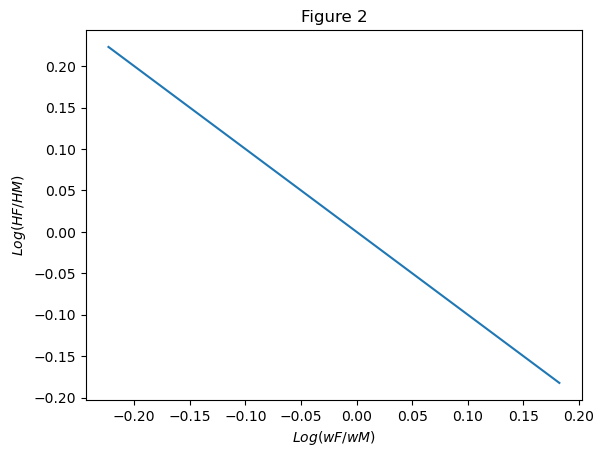

In [11]:
# Defining the female wages
wF_vec = model.par.wF_vec

# Defining the log-parameters for working at home and for the wages. 
    # opt.HFHM = HF[j]/HM[j] is added to the class
    # Note that since par.wM = 1.0 it is unnecessary to divide with it.
log_HFHM = []
log_wF = []

# Making a loop to find the optimal relationship between HF and HM for different female wages, but now with a continous model instead of a discrete.
for wF in wF_vec:
    model.par.wF = wF
    opt = model.solve()
    log_HFHM.append(np.log(opt.HF/opt.HM))
    log_wF.append(np.log(model.par.wF))

# Making a figure with added figure labels 
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(log_wF,log_HFHM)

ax.set_title('Figure 2')
ax.set_xlabel('$Log(wF/wM)$')
ax.set_ylabel('$Log(HF/HM)$');

Figure 2 shows $\log\frac{H_F}{H_M}$ plotted against $\log\frac{w_F}{w_M}$ for different values of $w_F$, when the time is continuous. The higher the female wage, the less women work in the household relative to men.

# Question 4

In [12]:
# Using the vector of female wages:
model = HSM.HouseholdSpecializationModelClass()
sol = model.solve_wF_vec(discrete=False)

# Printing the values
model.estimate()
print(f"\u03B1 = {model.par.alpha:.3f} and \u03C3 = {model.par.sigma:.3f}")


α= 0.982 and σ =0.100


A low value of $\sigma$ means a low elasticity of substitution between men and women.

A high value of $\alpha$ means a high productivity in home production for females relative to males implies that when it comes to working in the home, women are more productive compared to men.

# Question 5

We add a disutility of working in the labor market for women assuming they are more likely to give up work after having a baby regardless of earnings. The utility function looks as follows: $\frac{Q^{1-\rho}}{1-\rho}-\nu(\frac{T_{M}^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}+\frac{T_{F}^{1+\frac{1}{\epsilon}}}{1+\frac{1}{\epsilon}}+\theta*L_F)$.
We repeat the procedure for question 4, where we set $\alpha=0.5$ in this case.

In [16]:
# Using the vector of female wages:
model = HSM.NewHouseholdSpecializationModelClass()
sol = model.solve_wF_vec(discrete=False)

# Printing the values
model.estimate()
print(f"\u03B8 = {model.par.theta:.3f} and \u03C3 = {model.par.sigma:.3f}")

θ = 0.990 and σ = 0.134


A low value of $\sigma$ means a low elasticity of substitution between men and women, though it is a bit higher in this model than in the model in question 4.

A high value of $\theta$ means that there is a high disutility from women working in the labor market.